In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import quantecon_book_networks
import quantecon_book_networks.input_output as qbn_io
import quantecon_book_networks.plotting as qbn_plt
import quantecon_book_networks.data as qbn_data
import matplotlib as mpl
from matplotlib.patches import Polygon

## Creación del grafo

In [17]:
mip = pd.read_csv(r'../resources/MIP_normalizada.csv', index_col=0)
#valores_intermedios = pd.read_csv(r'../resources/Valores intermedios.csv')
red_sectores = mip.copy()
#red_sectores.to_csv('resources')

"""
columnas = mip.columns
for col in columnas:
  mip[col] = mip[col].astype(float)
  
  # Armo la matriz de coeficientes técnicos.
for i in range(mip.shape[0]):
  for j in range(mip.shape[0]):
    if valores_intermedios.iloc[j,0] != 0:
      mip.iloc[i, j] = mip.iloc[i, j] / valores_intermedios.iloc[j,0]
    else:
      mip.iloc[i,j] = 0

# Drop de sectores que no tienen relación con otros sectores (Hay 3)
for i, col in enumerate(columnas):
    if (mip[col] == 0).all():
        mip = mip.drop(labels=col, axis=0)
        mip = mip.drop(labels=col, axis=1)
        valores_intermedios.drop(i, inplace=True)

red_sectores = mip.copy()
red_sectores.to_csv('resources')
"""


"\ncolumnas = mip.columns\nfor col in columnas:\n  mip[col] = mip[col].astype(float)\n  \n  # Armo la matriz de coeficientes técnicos.\nfor i in range(mip.shape[0]):\n  for j in range(mip.shape[0]):\n    if valores_intermedios.iloc[j,0] != 0:\n      mip.iloc[i, j] = mip.iloc[i, j] / valores_intermedios.iloc[j,0]\n    else:\n      mip.iloc[i,j] = 0\n\n# Drop de sectores que no tienen relación con otros sectores (Hay 3)\nfor i, col in enumerate(columnas):\n    if (mip[col] == 0).all():\n        mip = mip.drop(labels=col, axis=0)\n        mip = mip.drop(labels=col, axis=1)\n        valores_intermedios.drop(i, inplace=True)\n\nred_sectores = mip.copy()\nred_sectores.to_csv('resources')\n"

## Cargamos el grafo

In [19]:
#red_sectores = pd.read_csv(r'C:\Users\shepe\Documents\GitHub\tp-msscae-2024\resources\red_sectores.csv')
red_sectores = nx.DiGraph(red_sectores.to_numpy())

## Visualización raw

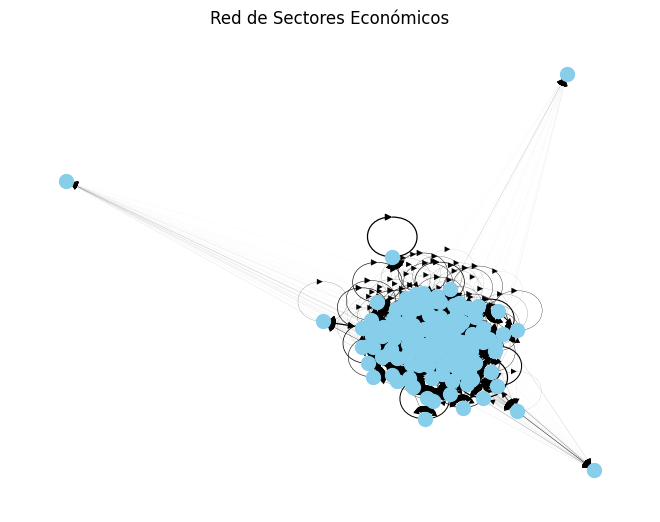

In [20]:
pos = nx.spring_layout(red_sectores)
edges = red_sectores.edges(data=True)
weights = [edge[2]['weight'] for edge in edges]

nx.draw(red_sectores, pos, with_labels=False, node_size=100, node_color="skyblue", font_size=10, font_weight="bold", width=weights)
plt.title("Red de Sectores Económicos")
plt.show()

## Análisis de grado

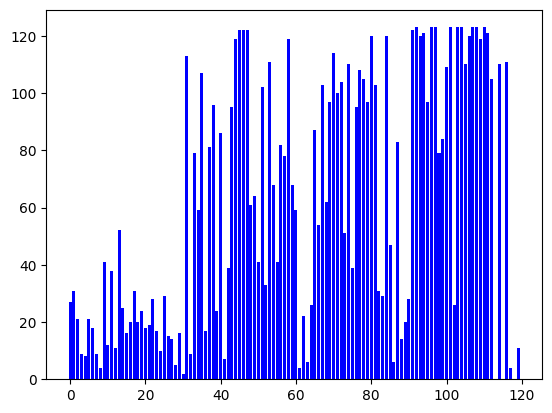

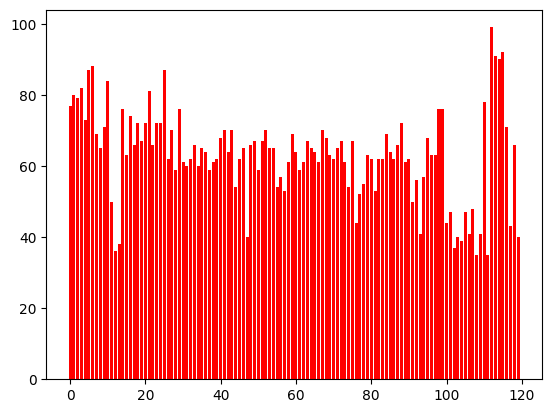

Media del Grado de salida:62.46666666666667
Desvio del Grado de salida:1953.6488888888891
Media del Grado de entrada:63.175
Desvio del Grado de entrada:165.294375


In [21]:
grados_in = red_sectores.in_degree
grados_out = red_sectores.out_degree
nodos= []
grado_salida = []
grado_entrada = []
for i in range(120):
    nodos.append(i)
    grado_salida.append(grados_out[i])
    grado_entrada.append(grados_in[i])
plt.bar(nodos, grado_salida, color ='blue')
plt.show()
plt.close()
plt.bar(nodos, grado_entrada, color ='red')
plt.show()
plt.close()


print(f'Media del Grado de salida:' + str(np.mean(grado_salida)))
print(f'Desvio del Grado de salida:' + str(np.var(grado_salida)))
print(f'Media del Grado de entrada:' + str(np.mean(grado_entrada)))
print(f'Desvio del Grado de entrada:' + str(np.var(grado_entrada)))


In [34]:

# Calculate In-Degree and Out-Degree
in_degrees = dict(red_sectores.in_degree())
out_degrees = dict(red_sectores.out_degree())
degrees = dict(red_sectores.degree())

plt.bar

# Calculate Weighted In-Degree and Out-Degree
weighted_in_degrees = dict(red_sectores.in_degree(weight='weight'))
weighted_out_degrees = dict(red_sectores.out_degree(weight='weight'))
weighted_degrees = dict(red_sectores.degree(weight='weight'))

# Print Degree Information
print("In-Degrees:", in_degrees)
print("Out-Degrees:", out_degrees)
print("Total Degrees:", degrees)
print("Weighted In-Degrees:", weighted_in_degrees)
print("Weighted Out-Degrees:", weighted_out_degrees)
print("Weighted Total Degrees:", weighted_degrees)

#Armamos tablas con los datos:
cant_nodes = list(red_sectores.nodes)
degrees_table = [0] * 123

for i in cant_nodes:
    degrees_table[i] = [mip.index[i], in_degrees[i], out_degrees[i], degrees[i]]

head = ["Sector", "In-Degrees", "Out-Degrees", "Total Degrees"]

df = pd.DataFrame(degrees_table, columns=head)


# los 10 con el Out-Degrees más alto
df.sort_values(by=["Out-Degrees"], ascending=False).head(10)

In-Degrees: {0: 77, 1: 80, 2: 79, 3: 82, 4: 73, 5: 87, 6: 88, 7: 69, 8: 65, 9: 71, 10: 84, 11: 50, 12: 36, 13: 38, 14: 76, 15: 63, 16: 74, 17: 66, 18: 72, 19: 67, 20: 72, 21: 81, 22: 66, 23: 72, 24: 72, 25: 87, 26: 62, 27: 70, 28: 59, 29: 76, 30: 61, 31: 60, 32: 62, 33: 66, 34: 60, 35: 65, 36: 64, 37: 59, 38: 61, 39: 62, 40: 68, 41: 70, 42: 64, 43: 70, 44: 54, 45: 62, 46: 65, 47: 40, 48: 66, 49: 67, 50: 59, 51: 67, 52: 70, 53: 65, 54: 65, 55: 54, 56: 57, 57: 53, 58: 61, 59: 69, 60: 64, 61: 59, 62: 61, 63: 67, 64: 65, 65: 64, 66: 61, 67: 70, 68: 68, 69: 63, 70: 62, 71: 65, 72: 67, 73: 61, 74: 54, 75: 67, 76: 44, 77: 52, 78: 55, 79: 63, 80: 62, 81: 53, 82: 62, 83: 62, 84: 69, 85: 64, 86: 62, 87: 66, 88: 72, 89: 61, 90: 62, 91: 50, 92: 56, 93: 41, 94: 57, 95: 68, 96: 63, 97: 63, 98: 76, 99: 76, 100: 44, 101: 47, 102: 37, 103: 40, 104: 39, 105: 47, 106: 41, 107: 48, 108: 35, 109: 41, 110: 78, 111: 35, 112: 99, 113: 91, 114: 90, 115: 92, 116: 71, 117: 43, 118: 66, 119: 40, 120: 67, 121: 66,

,Sector,In-Degrees,Out-Degrees,Total Degrees
103,Transporte marítimo,40,123,163
108,Instituciones Financieras,35,123,158
92,Electricidad,56,123,179
96,Comercio mayorista,63,123,186
97,Comercio minorista,63,123,186
110,Servicios a las empresas y profesionales,78,123,201
101,Transporte terrestre de carga,47,123,170
104,Transporte aéreo,39,123,162
107,Telecomunicaciones,48,123,171
91,Otras industrias manufactureras,50,122,172


In [25]:
from itertools import chain

In [26]:
list(red_sectores[1])

[1,
 2,
 10,
 14,
 16,
 17,
 18,
 19,
 21,
 22,
 23,
 24,
 25,
 26,
 29,
 52,
 54,
 70,
 98,
 99,
 101,
 110,
 112,
 113,
 114,
 115,
 116,
 118,
 120,
 121,
 122]

In [33]:
# los 10 con el Out-Degrees más bajo
df.sort_values(by=["Out-Degrees"], ascending=False).tail(10)

,Sector,In-Degrees,Out-Degrees,Total Degrees
63,"Artículos de hormigón, cemento y yeso",67,6,73
86,Carrocerías y remolques,62,6,68
28,Cerveza y malta,59,5,64
117,Servicios veterinarios,43,4,47
61,Arcilla y cerámica no refractaria para uso est...,59,4,63
8,Caza,65,4,69
30,Productos de tabaco,61,2,63
118,Servicios sociales,66,0,66
115,Salud humana pública,92,0,92
113,Enseñanza pública,91,0,91


In [35]:
# los 10 con el In-Degrees más alto
df.sort_values(by=["In-Degrees"], ascending=False).head(10)

,Sector,In-Degrees,Out-Degrees,Total Degrees
112,Administración pública y defensa y planes de l...,99,105,204
115,Salud humana pública,92,0,92
113,Enseñanza pública,91,0,91
114,Enseñanza privada,90,110,200
6,Producción de granja,88,18,106
25,Otros productos alimenticios,87,29,116
5,"Cría de ganado y producción de leche, lana y p...",87,21,108
10,Pesca,84,12,96
3,Cultivos industriales,82,9,91
21,Productos de panadería,81,19,100


In [36]:
# los 10 con el In-Degrees más bajo
df.sort_values(by=["In-Degrees"], ascending=False).tail(10)

,Sector,In-Degrees,Out-Degrees,Total Degrees
109,Seguros,41,119,160
103,Transporte marítimo,40,123,163
47,Refinación de petróleo,40,122,162
119,Servicios de saneamiento,40,11,51
104,Transporte aéreo,39,123,162
13,Extracción de otros minerales,38,52,90
102,Transporte por tuberías,37,26,63
12,Extracción de minerales metalíferos,36,11,47
111,Actividades inmobiliarias,35,121,156
108,Instituciones Financieras,35,123,158


## Comunidades 

In [37]:
G = nx.MultiDiGraph(red_sectores)
communities = nx.community.greedy_modularity_communities(G)

community_list = [list(community) for community in communities]
print("Comunidades:", community_list)
print("Cantidad de comunidades:", len(community_list))

Comunidades: [[8, 13, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 44, 45, 46, 47, 48, 50, 51, 53, 54, 55, 56, 57, 58, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 90, 91, 92, 93, 94, 95, 96, 97, 100, 101, 103, 104, 106, 107, 108, 109, 110, 111, 119], [0, 1, 2, 3, 5, 6, 9, 10, 11, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 42, 49, 52, 59, 98, 99, 102, 112, 113, 114, 115, 116, 117, 118, 120, 121, 122], [89, 4, 7], [105, 12, 76]]
Cantidad de comunidades: 4


In [38]:
print(G[13])

{1: {0: {'weight': 0.0005768374944625}}, 10: {0: {'weight': 6.275894032820254e-06}}, 11: {0: {'weight': 0.0729817597893424}}, 13: {0: {'weight': 0.02392778253366}}, 14: {0: {'weight': 0.000235640791765}}, 16: {0: {'weight': 0.0005357344928777}}, 17: {0: {'weight': 0.0002346557525113}}, 19: {0: {'weight': 0.0007031762411636}}, 22: {0: {'weight': 0.0008595959971944}}, 25: {0: {'weight': 5.0595198029157335e-05}}, 27: {0: {'weight': 0.0030969484886856}}, 28: {0: {'weight': 0.0006123138324316}}, 29: {0: {'weight': 0.0005693079141068}}, 32: {0: {'weight': 0.0011684281904742}}, 33: {0: {'weight': 0.0021172971012414}}, 40: {0: {'weight': 8.885501813173693e-05}}, 41: {0: {'weight': 0.0018209346094228}}, 48: {0: {'weight': 0.0161550243434541}}, 50: {0: {'weight': 3.0670540398206e-06}}, 51: {0: {'weight': 0.0044389823851997}}, 52: {0: {'weight': 0.0001656209181503}}, 53: {0: {'weight': 0.0103158608960997}}, 54: {0: {'weight': 0.0011641372997859}}, 55: {0: {'weight': 1.1492124626091783e-06}}, 56: 

In [39]:
## Intento de visualización por Clusters
G = nx.MultiDiGraph(red_sectores)
communities = nx.community.greedy_modularity_communities(G)

supergraph = nx.cycle_graph(len(communities))
superpos = nx.spring_layout(G, scale=50, seed=429)

centers = list(superpos.values())
print(centers)
'''pos = {}
for center, comm in zip(centers, communities):
    pos.update(nx.spring_layout(nx.subgraph(G, comm), center=center, seed=1430))
    
for nodes, clr in zip(communities, ("tab:blue", "tab:orange", "tab:green")):
    nx.draw_networkx_nodes(G, pos=pos, nodelist=nodes, node_color=clr, node_size=100)
nx.draw_networkx_edges(G, pos=pos)
'''
plt.tight_layout()
plt.show()

[array([2.4065517 , 1.65904042]), array([-2.8932345 ,  5.87374281]), array([-4.62633248,  7.0865956 ]), array([-8.7138049 ,  2.80891727]), array([ 6.71058567, -0.69029558]), array([0.10641685, 5.1259835 ]), array([3.2007962, 6.9976986]), array([ 5.76303515, -1.40908276]), array([-6.26770556,  1.66496247]), array([-5.46623797, -2.10830093]), array([ -0.7743295 , -12.82518323]), array([ 5.96161726, -4.81358882]), array([-9.50586458, -8.28453187]), array([ 4.1601422 , -5.72037033]), array([-1.9303274 ,  3.81642535]), array([-0.69638177, -8.40943562]), array([-2.73202449,  8.5331365 ]), array([0.76250433, 0.72969589]), array([-4.18011243, -3.1660646 ]), array([-7.51977692, -0.67954187]), array([7.77479386, 1.67243916]), array([-4.09315279, -3.90557786]), array([-1.62184719,  4.76672344]), array([-2.39086944,  0.69206218]), array([-8.19308772,  5.13169004]), array([-1.52163438,  5.53819642]), array([-8.12750388,  6.503692  ]), array([-9.54913743,  8.132637  ]), array([-9.80596799,  4.648513

<Figure size 640x480 with 0 Axes>